In [1]:
import numpy as np

def Conv2D(X, W, w0, p=(0,0), s=(1,1)): # X: 입력, W: 컨볼루션 필터, w0: 편차항, p: 패딩, s: 스트라이드 
  n1 = X.shape[0] + 2*p[0] # 패딩반영
  n2 = X.shape[1] + 2*p[1] 
  X_p = np.zeros(shape=(n1,n2)) # 패딩 사이즈에 대한 입력 크기
  X_p[p[0]:p[0]+X.shape[0], p[1]:p[1]+X.shape[1]]= X #입력 X 복사
  res = [] 
  for i in range(0, int((X_p.shape[0] - W.shape[0])/s[0])+1, s[0]):
    res.append([]) 
    for j in range(0, int((X_p.shape[1] - W.shape[1])/s[1])+1, s[1]): 
      X_s = X_p[i:i+W.shape[0], j:j+W.shape[1]] #컨볼루션 영역
      res[-1].append(np.sum(X_s * W) + w0) # 컨볼루션 연상부분. 해당 영역*컨볼루션+편차항
  return (np.array(res))

X = np.array([[1,1,1,0,0], [0,1,1,1,0], [0,0,1,1,1], [0,0,1,1,0], [0,1,1,0,0]]) # 입력
W = np.array([[1,0,1], [0,1,0], [1,0,1]]) # 컨볼루션 필터
w0 = 1 # 편차항 1

conv = Conv2D(X, W, w0, p=(0,0), s=(1,1)) # 패딩은 없고 스트라이드는 1 일때
print('X =', X) 
print('\nW =', W) 
print('\n컨볼루션 결과 p=(0,0), s=(1,1) \n', conv)  # 패딩은 1 스트라이드는 1 일때
conv = Conv2D(X, W, w0, p=(1,1), s=(1,1)) 
print('\n컨볼루션 결과 p=(1,1), s=(1,1) \n', conv) 
conv = Conv2D(X, W, w0, p=(1,1), s=(2,2))  # 패딩은 1 스트라이드는 2 일때
print('\n컨볼루션 결과 p=(1,1), s=(2,2) \n', conv)


X = [[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]

W = [[1 0 1]
 [0 1 0]
 [1 0 1]]

컨볼루션 결과 p=(0,0), s=(1,1) 
 [[5. 4. 5.]
 [3. 5. 4.]
 [3. 4. 5.]]

컨볼루션 결과 p=(1,1), s=(1,1) 
 [[3. 3. 4. 2. 2.]
 [2. 5. 4. 5. 2.]
 [2. 3. 5. 4. 4.]
 [2. 3. 4. 5. 2.]
 [1. 3. 3. 2. 2.]]

컨볼루션 결과 p=(1,1), s=(2,2) 
 [[3. 4.]
 [2. 5.]]


In [ ]:
import numpy as np

def maxPooling(mat, K, L): # 풀링
  M, N = mat.shape 
  MK = M // K # 크기
  NL = N // L  # 크기
  pmat = mat[:MK*K, :NL*L].reshape(MK, K, NL, L).max(axis= (1, 3)) # 각 블록에서 최대값을 선택
  return pmat

mat = np.array([[ 20, 200, -5, 23],
                [ -13, 134, 119, 100], 
                [ 120, 32, 49, 25], 
                [-120, 12, 9, 23]]) 

print(maxPooling(mat, 2,2)) # 2x2 풀링


In [ ]:
import numpy as np
import torch

A = torch.tensor([[1., -1.], [1., -1.]]) # 텐서 만들기. 리스트
print('A = ', A)

B = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]])) # 배열로 텐서 만들기
print('B = ', B)

C = torch.rand(3,3) # 3x3 랜덤으로 생성
print('C = ', C)

D = C.numpy() # C의 텐서를 numpy로 바꾸기
print('D = ', D)

E = B.view(1,1,2,3) # =reshape
print('E = ', E)

print('sum of A = ', A.sum()) # 텐서 A의 합
print('mean of A = ', A.mean()) # 텐서 A의 평균


In [ ]:
import torch
from torch.autograd import Variable

x = Variable(torch.tensor([[2.]]), requires_grad = True) # 텐서를 가지고 있는 객체. x에 대한 편미분 계산.
print('x = ', x)
print('x.data = ', x.data) # 계산값. 정방향
print('x.grad = ', x.grad) # 그레디언트 요소값을 가지고 있음
print('x.grad_fn() = ', x.grad_fn) # 어떤 계산을 했는지

y = x * x * 3
print('\ny = ', y)
print('y.data = ', y.data)# 계산값. 정방향
print('y.grad = ', y.grad) # 그레디언트 요소값을 가지고 있음
print('y.grad_fn() = ', y.grad_fn)# 어떤 계산을 했는지

z = y**2
print('\nz = ', z)
print('z.data = ', z.data)# 계산값. 정방향
print('z.grad = ', z.grad) # 그레디언트 요소값을 가지고 있음

z.backward( ) # 백워드 후
print('\nAfter invocation of backward()')
print('\nx = ', x)
print('x.data = ', x.data)# 계산값. 정방향
print('x.grad = ', x.grad) # 그레디언트 요소값을 가지고 있음
print('x.grad_fn( ) = ', x.grad_fn)# 어떤 계산을 했는지
print('\ny = ', y)
print('y.data = ', y.data)# 계산값. 정방향
print('y.grad = ', y.grad) # 그레디언트 요소값을 가지고 있음
print('y.grad_fn( ) = ', y.grad_fn)# 어떤 계산을 했는지
print('\nz = ', z)
print('z.data = ', z.data)# 계산값. 정방향
print('z.grad = ', z.grad) # 그레디언트 요소값을 가지고 있음


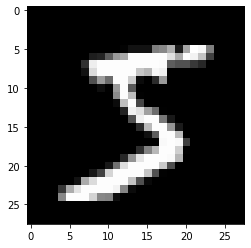

이미지 레이블 : 5
시작 정확도 : 986/10000(10%)
에포크 0: 완료
학습중 정확도 : 9560/10000(96%)
학습 후 정확도 : 9560/10000(96%)
에포크 1: 완료
학습중 정확도 : 9533/10000(95%)
학습 후 정확도 : 9533/10000(95%)
에포크 2: 완료
학습중 정확도 : 9503/10000(95%)
학습 후 정확도 : 9503/10000(95%)
10 번째 학습 데이터의 테스트 결과 : tensor([ -4.5331,   9.5026,  -6.4339,  -5.9192,  -2.4605, -10.7476,  -4.1642,
         -2.5063,  -5.4732,  -2.3699], grad_fn=<AddBackward0>)
10 번째 데이터의 예측:1
실제 레이블 : 1


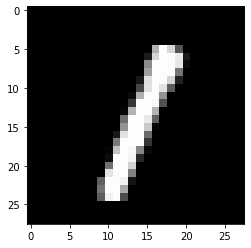

In [2]:
#-*- coding: utf-8 -*
from sklearn.datasets import fetch_openml # mnist데이터 가져옴
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist.data/255.0 # 입력부분->이미지 5
y = mnist.target # 레이블값-> 값 5

import matplotlib.pyplot as plt 
plt.imshow(X[0].reshape(28,28), cmap='gray') # 28,28 그레이로 바꿈
plt.show()
print('이미지 레이블 : {}'.format(y[0]))


import torch 
from torch.utils.data import TensorDataset, DataLoader 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=0) # 데이터 분할. 테스트 데이터 1/7만큼 나머진 학습 데이터
X_train = torch.Tensor(X_train) # 학습 데이터를 텐서 객체로 만든다
X_test = torch.Tensor(X_test) # 테스트 데이터를 텐서 객체로 만든다
y_train = torch.LongTensor(list(map(int, y_train))) # int형을 long형으로 바꾼다
y_test = torch.LongTensor(list(map(int, y_test)))# int형을 long형으로 바꾼다

ds_train = TensorDataset(X_train, y_train) # 입력과 출력에 대한 배열을 쌍으로 만든다
ds_test = TensorDataset(X_test, y_test)# 입력과 출력에 대한 배열을 쌍으로 만든다

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True) # 데이터 읽어들이기. 학습 데이터는 섞음
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)# 데이터 읽어들이기. 테스트 데이터는 안섞어도 됨

from torch import nn 
model = nn.Sequential() # 뉴럴 네트워크. 순차적으로
model.add_module('fc1', nn.Linear(28*28*1, 100)) # 은닉층 노드 100개
model.add_module('relul', nn.ReLU()) # ReLU
model.add_module('fc2', nn.Linear(100,100)) # 은닉층 노드 100개
model.add_module('relu2', nn.ReLU()) # ReLU
model.add_module('fc3', nn.Linear(100,10)) # 출력층.마지막 출력은 10개

from torch import optim 
loss_fn = nn.CrossEntropyLoss() # 손실함수
optimizer = optim.Adam(model.parameters(), lr=0.01) 

def train(epoch):
  model.train() # 학습 모드로 변환한다
  for data, targets in loader_train:
    optimizer.zero_grad() # 그레디언트 초기화
    outputs = model(data) # forward 계산
    loss = loss_fn(outputs, targets) # 손실함수 계산
    loss.backward()# backward하면 그레디언트 계산
    optimizer.step() # 아담에 대해 stable
  print('에포크 {}: 완료'.format(epoch))

def test(head):
   model.eval() # 테스트 모드로 변환
   correct = 0 
   with torch.no_grad(): # 그레디언트 계산 안함
     for data, targets in loader_test: 
       outputs = model(data) # forward 계산
       _, predicted = torch.max(outputs.data, 1) # 최대값
       correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정확도 계산
   data_num = len(loader_test.dataset) 
   print('{} 정확도 : {}/{}({:.0f}%)'.format(head, correct, data_num, 100.*correct/data_num))

test('시작') 
for epoch in range(3):
   train(epoch) 
   test('학습중')
   test('학습 후')

index = 10 # 테스트 데이터중에서 확인해볼 데이터의 인덱스
model.eval() # 모델 테스트 모드로 전환
data = X_test[index] 
output = model(data) # 모델 적용
print('{} 번째 학습 데이터의 테스트 결과 : {}'.format(index,output)) 
_, predicted = torch.max(output.data, 0) 
print('{} 번째 데이터의 예측:{}'.format(index, predicted)) 
X_test_show = (X_test[index]).numpy() 
plt.imshow(X_test_show.reshape(28,28), cmap='gray') 
print('실제 레이블 : {}'.format(y_test[index]))


In [ ]:
#-*- coding: utf-8 -*
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist.data/255.0# 입력부분->이미지 5
y = mnist.target# 레이블값-> 값 5

import matplotlib.pyplot as plt 
plt.imshow(X[0].reshape(28,28), cmap='gray') # 28,28 그레이로 바꿈
plt.show() 
print('이미지 레이블 : {}'.format(y[0]))


In [3]:

import torch 
from torch.utils.data import TensorDataset, DataLoader 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=0) # 데이터 분할. 테스트 데이터 1/7만큼 나머진 학습 데이터
X_train = torch.Tensor(X_train) # 학습 데이터를 텐서 객체로 만든다
X_test = torch.Tensor(X_test) # 테스트 데이터를 텐서 객체로 만든다
y_train = torch.LongTensor(list(map(int, y_train))) # int형을 long형으로 바꾼다
y_test = torch.LongTensor(list(map(int, y_test)))# int형을 long형으로 바꾼다

ds_train = TensorDataset(X_train, y_train) # 입력과 출력에 대한 배열을 쌍으로 만든다
ds_test = TensorDataset(X_test, y_test)# 입력과 출력에 대한 배열을 쌍으로 만든다

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True) # 데이터 읽어들이기. 학습 데이터는 섞음
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)# 데이터 읽어들이기. 테스트 데이터는 안섞어도 됨


from torch import nn 
model = nn.Sequential() # 뉴럴 네트워크. 순차적으로
model.add_module('fc1', nn.Linear(28*28*1, 100)) # 은닉층 노드 100개
model.add_module('relul', nn.ReLU()) # ReLU
model.add_module('fc2', nn.Linear(100,100)) # 은닉층 노드 100개
model.add_module('relu2', nn.ReLU()) # ReLU
model.add_module('fc3', nn.Linear(100,10)) # 출력층.마지막 출력은 10개

from torch import optim 
loss_fn = nn.CrossEntropyLoss() # 손실함수
optimizer = optim.Adam(model.parameters(), lr=0.01) 

def train(epoch):
  model.train() # 학습 모드로 변환한다
  for data, targets in loader_train:
    optimizer.zero_grad() # 그레디언트 초기화
    outputs = model(data) # forward 계산
    loss = loss_fn(outputs, targets) # 손실함수 계산
    loss.backward()# backward하면 그레디언트 계산
    optimizer.step() # 아담에 대해 stable
  print('에포크 {}: 완료'.format(epoch))

def test(head):
   model.eval() # 테스트 모드로 변환
   correct = 0 
   with torch.no_grad(): # 그레디언트 계산 안함
     for data, targets in loader_test: 
       outputs = model(data) # forward 계산
       _, predicted = torch.max(outputs.data, 1) # 최대값
       correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정확도 계산
   data_num = len(loader_test.dataset) 
   print('accuracy = ',100.*correct/data_num)

for epoch in range(3):
   train(epoch) 
   test('학습중')


epoch 0: 완료
accuracy =  tensor(94.3500)
epoch 1: 완료
accuracy =  tensor(95.4300)
epoch 2: 완료
accuracy =  tensor(96.1200)


In [4]:
#-*- coding: utf-8 -*
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data
y = mnist.target

import torch 
from torch.utils.data import TensorDataset, DataLoader 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=0) # 데이터 분할. 테스트 데이터 1/7만큼 나머진 학습 데이터
X_train = torch.Tensor(X_train) # 학습 데이터를 텐서 객체로 만든다
X_test = torch.Tensor(X_test) # 테스트 데이터를 텐서 객체로 만든다
y_train = torch.LongTensor(list(map(int, y_train))) # int형을 long형으로 바꾼다
y_test = torch.LongTensor(list(map(int, y_test)))# int형을 long형으로 바꾼다

import torch.nn as nn 
import torch.nn.functional as F 
from torch import optim 
from torch.autograd import Variable

X_train = X_train.view(-1, 1,28,28).float() 
X_test = X_test.view(-1,1,28,28).float() 
print(X_train.shape) 
print(X_test.shape)

train = TensorDataset(X_train, y_train) # 입력과 출력에 대한 배열을 쌍으로 만든다
test = TensorDataset(X_test, y_test)# 입력과 출력에 대한 배열을 쌍으로 만든다
BATCH_SIZE = 32 
loader_train = DataLoader(train, batch_size = BATCH_SIZE, shuffle = False) # 데이터 읽어들이기. 학습 데이터는 섞음
loader_test = DataLoader(test, batch_size = BATCH_SIZE, shuffle =False)# 데이터 읽어들이기. 테스트 데이터는 안섞어도 됨

class CNN(nn.Module): # CNN 모델 
  def __init__(self): # 생성자. 최기화
    super(CNN, self).__init__() 
    self.conv1 = nn.Conv2d(1, 32, kernel_size=5) # (input 채널 수, output 채널 수, 커널 사이즈)
    self.conv2 = nn.Conv2d(32, 32, kernel_size=5) # 채널이 32개 들어옴
    self.conv3 = nn.Conv2d(32,64, kernel_size=5) # 채널 32개 들어와서 64개 생성
    self.fc1 = nn.Linear(3*3*64, 256) # 256개 출력 만든다
    self.fc2 = nn.Linear(256, 10) # 10개 출력 만든다

    self.loss_fn = nn.CrossEntropyLoss() # 손실 함수
    self.optimizer = optim.Adam(self.parameters(), lr=0.01) # 최적화는 아담 사용

  def forward(self, x):
    x = F.relu(self.conv1(x)) # 입력conv1.
    x = F.relu(F.max_pool2d(self.conv2(x), 2)) # 입력은 conv2.relu로 바꿈
    x = F.dropout(x, p=0.5, training=self.training) # 피처맵의 노드 드롭아웃
    x = F.relu(F.max_pool2d(self.conv3(x), 2)) # 입력은 conv3.relu로 바꿈
    x = F.dropout(x, p=0.5, training=self.training) # 피처맵의 노드 드롭아웃
    x = x.view(-1,3*3*64 ) # reshape 일차원
    x = F.relu(self.fc1(x)) # relu 적용
    x = F.dropout(x, training=self.training)  # 드롭아웃
    x = self.fc2(x) 
    return F.log_softmax(x, dim=1) # 로그 소프트맥스. 효율적


def fit(model, loader_train): # 학습
    optimizer = torch.optim.Adam(model.parameters()) # 아담으로 지정
    error = nn.CrossEntropyLoss() # 손실함수
    EPOCHS = 1 
    model.train() # 학습
    for epoch in range(EPOCHS):
        correct = 0 
        for batch_idx, (X_batch, y_batch) in enumerate(loader_train):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad() # 그레디언트 초기화
            output = model(var_X_batch) 
            loss = error(output, var_y_batch) # 에러 계산 
            loss.backward() # 그레디언트 계산
            optimizer.step() # 파라미터 값이 변함
            predicted = torch.max(output.data, 1)[1] # 최대값
            correct += (predicted == var_y_batch).sum()
            if batch_idx % 50 == 0:
                print('에포크 : {} [{}/{} ({:.0f}%)]Wt 손실함수 :{:.6f}Wt Accuracy:{:.3f}%'.format(
                   epoch, batch_idx*len(X_batch), len(loader_train), 
                   100.*batch_idx / len(loader_train), 
                   loss.data, 
                   correct*100./ (BATCH_SIZE*(batch_idx+1))))

def evaluate(model): # 평가
    correct = 0 
    for test_imgs, test_labels in loader_test:
        test_imgs = Variable(test_imgs).float()
        output = model(test_imgs) 
        predicted = torch.max(output, 1)[1] # 최대값 선택
        correct += (predicted == test_labels).sum() # 예측과 레이블이 같은 값의 합
    print("테스트 데이터 정확도: {:.3f}% ".format( float(correct) /(len(loader_test)*BATCH_SIZE))) 
cnn = CNN()
evaluate(cnn) # 평가
fit(cnn, loader_train) # 학습 
cnn.eval() # 테스트 모드로 전환
evaluate(cnn)# 평가
index = 10 # 테스트 데이터 중에서 확인해볼 데이터의 인덱스
data = X_test[index].view(-1, 1,28,28).float()
output = cnn(data) # 모델 적용
print('{}번째 학습데이터의 테스트 결과 : {}'.format(index, output))
_, predicted = torch.max(output, 1) 
print('{}번째 데이터의 예측:{}'.format(index, predicted.numpy())) 
print('실제 레이블 : {}'.format(y_test[index]))


torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])
테스트 데이터 정확도: 0.100% 
에포크 : 0 [0/1875 (0%)]Wt 손실함수 :17.332268Wt Accuracy:9.375%
에포크 : 0 [1600/1875 (3%)]Wt 손실함수 :2.151724Wt Accuracy:15.074%
에포크 : 0 [3200/1875 (5%)]Wt 손실함수 :1.870488Wt Accuracy:25.650%
에포크 : 0 [4800/1875 (8%)]Wt 손실함수 :1.056139Wt Accuracy:36.734%
에포크 : 0 [6400/1875 (11%)]Wt 손실함수 :0.720588Wt Accuracy:45.351%
에포크 : 0 [8000/1875 (13%)]Wt 손실함수 :0.833817Wt Accuracy:52.067%
에포크 : 0 [9600/1875 (16%)]Wt 손실함수 :0.495041Wt Accuracy:57.112%
에포크 : 0 [11200/1875 (19%)]Wt 손실함수 :0.342913Wt Accuracy:61.084%
에포크 : 0 [12800/1875 (21%)]Wt 손실함수 :0.920518Wt Accuracy:64.277%
에포크 : 0 [14400/1875 (24%)]Wt 손실함수 :0.390798Wt Accuracy:66.623%
에포크 : 0 [16000/1875 (27%)]Wt 손실함수 :0.202017Wt Accuracy:68.750%
에포크 : 0 [17600/1875 (29%)]Wt 손실함수 :0.391542Wt Accuracy:70.520%
에포크 : 0 [19200/1875 (32%)]Wt 손실함수 :0.626298Wt Accuracy:72.073%
에포크 : 0 [20800/1875 (35%)]Wt 손실함수 :0.249675Wt Accuracy:73.459%
에포크 : 0 [22400/1875 (37%)]Wt 손실함수 :0.093292Wt Acc

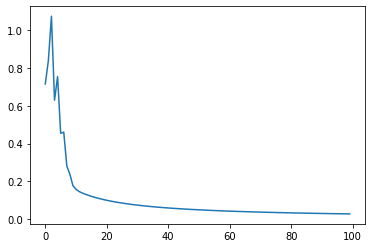

In [ ]:
# IRIS 데이터의 학습

import torch 
from torch import nn, optim 
from sklearn.datasets import load_iris 
from torch.utils.data import TensorDataset, DataLoader

iris = load_iris() # 아이리스 데이터 가져오기

X = iris.data[:100] # 입력 데이터
y = iris.target [:100] # 출력 데이터

X = torch.tensor (X, dtype=torch.float32) # 입력 데이터를 텐서 객체로 만든다.
y = torch.tensor(y, dtype=torch.float32) # 출력 데이터를 텐서 객체로 만든다.

net = nn.Linear(4,1) # 1개로 출력
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid + BCELoss. 이진일 때 
optimizer = optim.SGD(net.parameters(), lr=0.25) # SGD로 손실 줄이기

losses = []

for epoc in range(100):
  batch_loss = 0.0 
  optimizer.zero_grad() # 그레디언트 초기화
  y_pred = net(X) 
  loss = loss_fn(y_pred.view_as(y), y) # 손실함수 적용 
  loss.backward() # 그레디언트 계산
  optimizer.step() 
  batch_loss += loss.item()
  
  losses.append(batch_loss)
  
from matplotlib import pyplot as plt 
plt.plot(losses) 
plt.show()


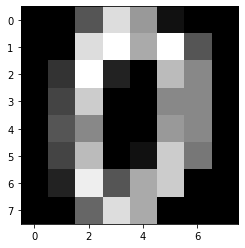

In [ ]:
# 8x8 MNIST 데이터의 인식

import torch 
from torch import nn, optim 
from sklearn.datasets import load_digits 
from torch.utils.data import TensorDataset, DataLoader 
import time 
import matplotlib.pyplot as plt

digits = load_digits() # 숫자 데이터 가져오기
X = digits.data # 입력 데이터
Y = digits.target # 출력 타겟

plt.imshow(X[0].reshape(8,8), cmap='gray') # 8,8에 그레이 이미지
plt.show()

X = torch.tensor(X, dtype=torch.float32) # 입력 데이터를 텐서 객체로 만든다.
Y = torch.tensor(Y, dtype=torch.int64) # 출력 데이터를 텐서 객체로 만든다.

dataset = TensorDataset(X,Y) # 입력과 출력에 대한 배열을 쌍으로 만든다
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)# 데이터 읽어들이기. 학습 데이터는 섞음

net = nn.Sequential( # 순차적으로
    nn.Linear(64,32), # 노드 32개
    nn.ReLU(),# relu 적용
    nn.Linear(32,16),# 노드 16개
    nn.ReLU(),# relu 적용
    nn.Linear(16,10)# 최종 출력 노드 10개
)

실행시간 : 3.44721 sec


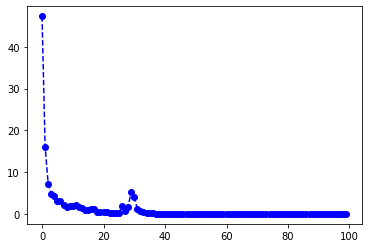

In [ ]:
loss_function = nn.CrossEntropyLoss() # 손실함수
optimizer = optim.Adam(net.parameters(), lr=0.005) # 옵티마이저로 아담 설정

losses = [] 
start_time = time.time()

for epoch in range(0, 100):
  running_loss = 0 
  for x_minibatch, y_minibatch in train_loader:
    pred = net(x_minibatch) 
    loss = loss_function(pred, y_minibatch) # 손실함수 계산
    optimizer.zero_grad() # 그레디언트 초기화
    loss.backward() #  backward하면 그레디언트 계산
    optimizer.step()# 아담에 대해 stable
    running_loss += loss.item() 
  losses.append(running_loss)

print('실행시간 : %0.5f sec' % (time.time()-start_time))

plt.plot(losses, color='blue', linestyle='dashed', marker='o') 
plt.show()
